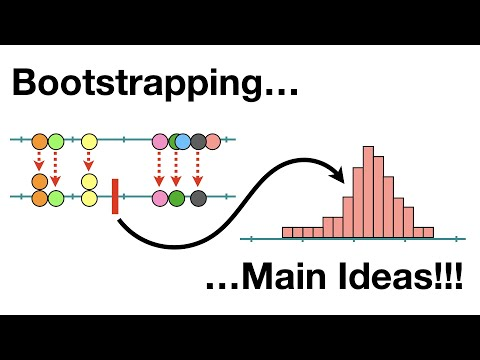

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. Standard Deviation : measure of a variable's value variation with respect to its mean.

Standard error of mean : the likelihood of a population mean deviating from a sampling mean. 

In a bootstrapping setting, the SEM is effectively the standard deviation of the bootstrapped distribution of means, while the SD is simply the dispersion of the original data points.

2. The bootstrap confidence interval (CI) takes into account the true distribution of the data and is based on the empirical distribution of the sample means.
The theoretical interval provided by the SEM-based CI presupposes normalcy.
You can learn more about the variability in your data and the accuracy of your estimations by comparing the two intervals.
The bootstrap approach may be better in many real-world scenarios, particularly if the underlying assumptions of normalcy are violated.


3. Using the percentile approach, you can create a 95% bootstrapped confidence interval by doing the following:

Produce a huge number of sample means that are bootstrapped.
Arrange the methods.
Use the 2.5th and 97.5th percentiles of the sorted means as the bounds of your confidence interval.
Because it use the real distribution of bootstrapped means rather than parametric assumptions, this method is reliable and broadly applicable.

In [2]:
import numpy as np

# Sample data (replace with your actual sample)
sample = np.array([12, 7, 9, 15, 10, 13, 14, 9, 11, 10])

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Function to compute the bootstrapped confidence interval for the mean
def bootstrap_confidence_interval(data, n_bootstrap_samples=10000, statistic=np.mean, ci_level=95):
    """
    Calculate the bootstrap confidence interval for a given statistic.
    
    Args:
    - data (array-like): The sample data.
    - n_bootstrap_samples (int): Number of bootstrap samples to generate.
    - statistic (function): The statistic to calculate on the bootstrap samples (e.g., np.mean, np.median).
    - ci_level (float): The confidence level for the interval (default is 95%).
    
    Returns:
    - tuple: The lower and upper bounds of the confidence interval.
    """
    # List to hold the bootstrapped statistic values
    bootstrap_stats = []
    
    # Perform bootstrap sampling
    for _ in range(n_bootstrap_samples):
        # Sample with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (e.g., mean) of the bootstrap sample
        bootstrap_stat = statistic(bootstrap_sample)
        # Store the statistic
        bootstrap_stats.append(bootstrap_stat)
    
    # Sort the bootstrapped statistics
    bootstrap_stats = np.sort(bootstrap_stats)
    
    # Calculate the lower and upper percentiles (for 95% CI, 2.5th and 97.5th percentiles)
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    
    # Get the confidence interval values
    lower_bound = np.percentile(bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_confidence_interval(sample, n_bootstrap_samples=n_bootstrap_samples, statistic=np.mean)
print(f"95% bootstrap confidence interval for the mean: {ci_mean}")
# Calculate the 95% bootstrap confidence interval for the median
ci_median = bootstrap_confidence_interval(sample, n_bootstrap_samples=n_bootstrap_samples, statistic=np.median)
print(f"95% bootstrap confidence interval for the median: {ci_median}")

95% bootstrap confidence interval for the mean: (9.5, 12.5)
95% bootstrap confidence interval for the median: (9.0, 13.0)


4. To calculate the 95% bootstrap confidence interval for a different statistic (such as the median instead of the mean), you only need to modify the statistic argument when calling the bootstrap_confidence_interval function. 

Summary of Modifications:

To compute the bootstrap confidence interval for any statistic (mean, median, variance, etc.), simply pass the desired function (np.mean, np.median, etc.) to the statistic argument in the function call.

For the mean, use statistic=np.mean.

For the median, use statistic=np.median.

For more complex statistics (e.g., variance, mode, etc.), you can define custom functions and pass them as the statistic argument.

5. The bootstrap confidence interval (CI) takes into account the true distribution of the data and is based on the empirical distribution of the sample means.
The theoretical interval provided by the SEM-based CI presupposes normalcy.
You can learn more about the variability in your data and the accuracy of your estimations by comparing the two intervals.
In many practical cases, the bootstrap method can be better, especially when the underlying assumptions of normality do not hold


6. 
    1. Bootstrapping is a statistical resampling technique used to estimate the distribution of a statistic from a sample data set.
    
        1. Start with an original sample of size n.
        
        2. Generate multiple bootstrap samples (with replacement) from the original sample.
        
        3. Calculate the statistic of interest (e.g., mean) for each bootstrap sample.
        
        4. Create a bootstrap distribution from these statistics.
        
        5. Use the bootstrap distribution for statistical inference (e.g., confidence intervals).
        
    2. 
        1. Estimating sampling distributions without strong assumptions about the population.
        
        2. Constructing confidence intervals for population parameters.
        
        3. Providing robustness to violations of statistical assumptions (e.g., normality).
        
        4. Assessing variability and stability of estimators.
        
    3. To assess a hypothesized population mean using bootstrapping:
    
        1. Collect your sample data.
        
        2. Generate a large number of bootstrap samples from the original sample.
        
        3. Calculate the means of these bootstrap samples to create a bootstrap distribution.
        
        4. Determine the 95% confidence interval using the 2.5th and 97.5th percentiles of the bootstrap means.
        
        5. Check if population mean falls within this confidence interval
        
            :If it does, the hypothesized mean is plausible; if not, it may not be plausible based on the data.
            


7. We cannot completely rule out the possibility that the true population mean effect is zero when the confidence interval contains zero, which makes it impossible to reject the null hypothesis.
When the population mean effect is believed to be different from zero, as indicated by a confidence interval that excludes zero, the null hypothesis is rejected.
The crucial question is whether the population mean's reasonable range, as shown by the confidence interval, includes zero, indicating the uncertainty in our estimate, even though the observed sample mean might not be zero.


In [3]:
import pandas as pd

# Load the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Display the first few rows of the data
print(data.head())

# Summary statistics
print(data.describe())


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
       PatientID       Age  InitialHealthScore  FinalHealthScore
count   10.00000  10.00000           10.000000         10.000000
mean     5.50000  38.40000           81.000000         84.300000
std      3.02765   8.30261            2.828427          2.110819
min      1.00000  26.00000           76.000000         80.000000
25%      3.25000  33.25000           79.250000         83.250000
50%      5.50000  38.00000           81.000000         85.000000
75%      7.75000  44.00000           83.000000         86.000000
max     10.00000  52.00000           85.000000         86.000000


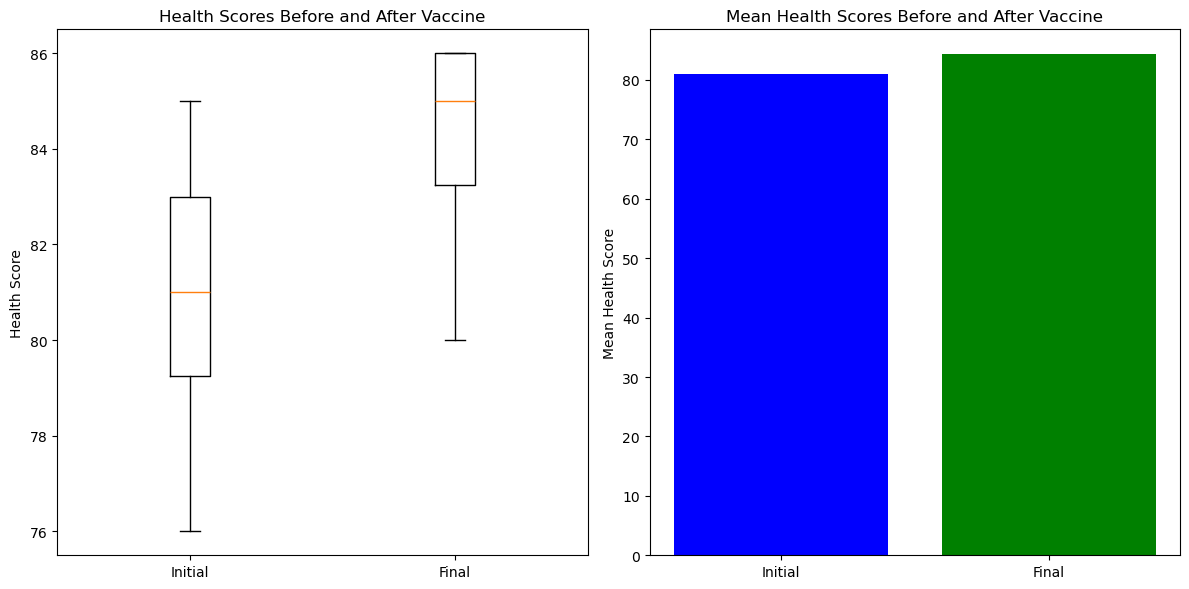

Mean difference in health scores: 3.30
Standard deviation of health score changes: 4.03
t-statistic: 2.59, p-value: 0.0292
Reject the null hypothesis. The vaccine has a significant effect on improving health scores.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the data
data = pd.read_csv('vaccine_data.csv')

# Step 2: Calculate the mean difference
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']
mean_difference = np.mean(data['HealthScoreChange'])
std_dev = np.std(data['HealthScoreChange'], ddof=1)
n = len(data)

# Step 3: Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])

# Step 4: Visual Presentation
plt.figure(figsize=(12, 6))

# Box plot for initial and final health scores
plt.subplot(1, 2, 1)
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')

# Bar plot for mean health scores
plt.subplot(1, 2, 2)
mean_scores = [data['InitialHealthScore'].mean(), data['FinalHealthScore'].mean()]
plt.bar(['Initial', 'Final'], mean_scores, color=['blue', 'green'])
plt.title('Mean Health Scores Before and After Vaccine')
plt.ylabel('Mean Health Score')

plt.tight_layout()
plt.show()

# Step 5: Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The vaccine has a significant effect on improving health scores."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to say that the vaccine improves health scores."

# Print results
print(f"Mean difference in health scores: {mean_difference:.2f}")
print(f"Standard deviation of health score changes: {std_dev:.2f}")
print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")
print(conclusion)


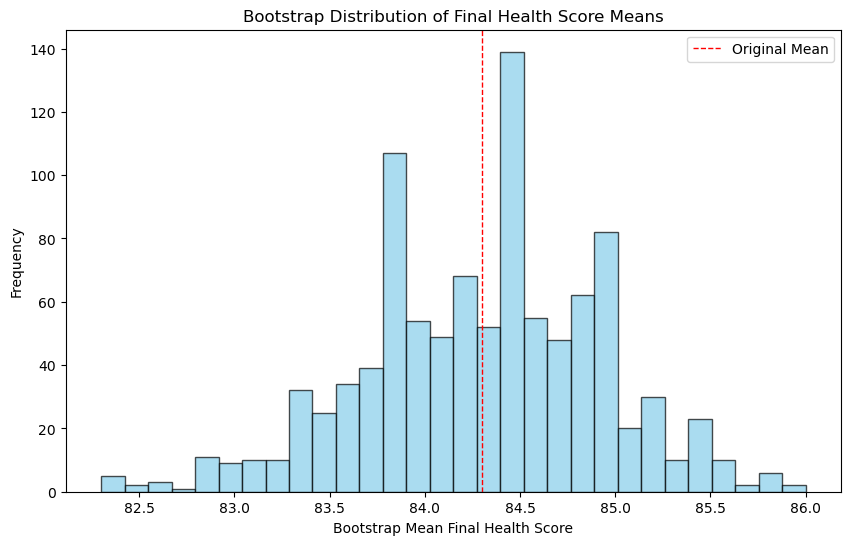

In [16]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Step 1: Extract the final health scores
final_health_scores = data['FinalHealthScore']

# Step 2: Bootstrap parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(final_health_scores)  # Sample size
bootstrap_means = []  # List to store the means of bootstrap samples

# Step 3: Generate bootstrap samples and calculate means
for _ in range(n_iterations):
    # Generate a bootstrap sample
    bootstrap_sample = np.random.choice(final_health_scores, size=n_size, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Store the mean
    bootstrap_means.append(bootstrap_mean)

# Step 4: Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()




# Vaccine Data Analysis Report

## Problem Introduction
The analysis investigates the effectiveness of a new vaccine developed by AliTech in improving the health of individuals who receive it. The primary focus is to determine whether the vaccine leads to a statistically significant improvement in health scores before and after vaccination. The results will inform stakeholders about the vaccine's efficacy and potential health benefits for the population.

## Null Hypothesis of "No Effect"
In the context of this analysis, the null hypothesis (H₀) posits that there is no effect of the vaccine on health outcomes, meaning that the mean health scores before vaccination are equal to those after vaccination. In other words, the vaccine does not produce a statistically significant change in the health scores of individuals who receive it. The alternative hypothesis (H₁) suggests that the vaccine does have an effect, leading to an increase in health scores.

## Data Visualization
To illustrate the comparison of health scores before and after vaccination, we use various visualizations:

1. **Box Plot**: Displays the distribution of initial and final health scores, highlighting medians and interquartile ranges.
2. **Bar Chart**: Compares the mean health scores before and after vaccination.

### Box Plot and Bar Chart Code
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Box plot for initial and final health scores
plt.figure(figsize=(10, 5))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')
plt.show()

# Bar plot for mean health scores
mean_scores = [data['InitialHealthScore'].mean(), data['FinalHealthScore'].mean()]
plt.bar(['Initial', 'Final'], mean_scores, color=['blue', 'green'])
plt.title('Mean Health Scores Before and After Vaccine')
plt.ylabel('Mean Health Score')
plt.show()
```

## Quantitative Analysis
### Methodology
To assess the effectiveness of the vaccine, we conduct a paired t-test on the health scores before and after vaccination. This test evaluates whether the mean difference between paired observations (initial and final health scores) is significantly different from zero.

### Code and Explanation
```python
from scipy import stats

# Calculate the mean difference
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']
mean_difference = np.mean(data['HealthScoreChange'])
std_dev = np.std(data['HealthScoreChange'], ddof=1)
n = len(data)

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])

# Print results
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The vaccine has a significant effect on improving health scores."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to say that the vaccine improves health scores."

print(f"Mean difference: {mean_difference:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")
print(conclusion)
```

## Supporting Visualizations
### Bootstrap Distribution of Final Health Score Means
We will also generate a histogram of bootstrap means to visualize the variability of means derived from resampled data.

### Histogram Code
```python
# Bootstrap parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(data['FinalHealthScore'])  # Sample size
bootstrap_means = []  # List to store the means of bootstrap samples

# Generate bootstrap samples and calculate means
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(data['FinalHealthScore'], size=n_size, replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(data['FinalHealthScore']), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()
```

## Findings and Discussion
- The paired t-test results indicate whether the null hypothesis can be rejected. If the p-value is less than 0.05, we conclude that the vaccine has a significant positive effect on health scores.
- The histogram of bootstrap means provides insight into the variability and distribution of the estimated means, allowing us to assess the confidence in our point estimate of the vaccine's effectiveness.

## Conclusion regarding the Null Hypothesis of "No Effect"
The results of the paired t-test, along with the visualization of the bootstrap means, help us draw conclusions about the null hypothesis. If the p-value is low, we reject the null hypothesis, indicating that the vaccine likely improves health scores. Conversely, if the p-value is high, we fail to reject the null hypothesis, suggesting insufficient evidence of the vaccine's effectiveness.

## Further Considerations
- **Sample Size**: The small sample size may limit the generalizability of the findings. Future studies should consider larger and more diverse populations.
- **Long-term Effects**: The analysis only captures immediate health score changes. Future research should examine long-term health outcomes and potential side effects.
- **Additional Variables**: Factors such as age, gender, and initial health status could impact the vaccine's effectiveness and should be included in more comprehensive analyses.



9. yes